# P06: Goodness-of-fit and hypothesis testing

## Problem 1: Fitting stellar luminosities

Let us assume that we measure the luminosity as a function of time for four samples of stars. Each sample contains 100 stars and we measure their luminosity at 50 times each. The recorded values for the stellar luminosities for four samples are in the `data` directory and designated `starcat_1.npy`, `starcat_2.npy`, `starcat_3.npy` and `starcat_4.npy`. The values are given in units of $L_\odot$.

Our hypothesis is that all stars in these four catalogs are non-variable, i.e. their luminosity does not vary as a function of time, and that the observed luminosities are normally distributed with a standard deviation of $\sigma(L_*)=0.1L_*$.

(i) Test if the data is consistent with this hypothesis by comparing the data to model predictions and computing the $\chi^2$ values of the observed data with respect to the assumed model.

(ii) Try to diagnose the reasons for the discrepancies found (if any).

In the next three problems, we want to analyze seven astrophysical catalogs containing the magnitudes of galaxies in three different wavelength bands. The goal is to find out if some of the datasets are not consistent with each other.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
s1 = np.load('data/starcat_1.npy')
s2 = np.load('data/starcat_2.npy')
s3 = np.load('data/starcat_3.npy')
s4 = np.load('data/starcat_4.npy')

In [62]:
import numpy as np
from scipy.stats import chi2

# Daten laden
starcat_1 = np.load('data/starcat_1.npy')
#starcat_2 = np.load('data/starcat_2.npy')
#starcat_3 = np.load('data/starcat_3.npy')
#starcat_4 = np.load('data/starcat_4.npy')

# Annahmen
sigma = 0.1  # Standardabweichung
#expected_std = np.std(np.concatenate([starcat_1, starcat_2, starcat_3, starcat_4]))  # Erwartete Standardabweichung
expected_std= np.std(starcat_1[0])
print(expected_std)
'''
# Berechnung der Chi-Quadrat-Werte
chi_squared_1 = np.sum(((starcat_1 - np.mean(starcat_1)) / expected_std) ** 2)
chi_squared_2 = np.sum(((starcat_2 - np.mean(starcat_2)) / expected_std) ** 2)
chi_squared_3 = np.sum(((starcat_3 - np.mean(starcat_3)) / expected_std) ** 2)
chi_squared_4 = np.sum(((starcat_4 - np.mean(starcat_4)) / expected_std) ** 2)

# Freiheitsgrade (Anzahl der Messungen - 1)
df = len(starcat_1.flatten()) - 1

# Chi-Quadrat-Kritischer Wert für Signifikanzniveau 0.05
critical_value = chi2.ppf(0.95, df)

# Ergebnisse ausgeben
print(f'Chi-Quadrat-Wert für Katalog 1: {chi_squared_1}')
print(f'Chi-Quadrat-Wert für Katalog 2: {chi_squared_2}')
print(f'Chi-Quadrat-Wert für Katalog 3: {chi_squared_3}')
print(f'Chi-Quadrat-Wert für Katalog 4: {chi_squared_4}')

print(f'Kritischer Wert bei {df} Freiheitsgraden: {critical_value}')

# Überprüfen, ob die Hypothese abgelehnt wird
if chi_squared_1 > critical_value or chi_squared_2 > critical_value or chi_squared_3 > critical_value or chi_squared_4 > critical_value:
    print('Die Hypothese wird abgelehnt. Die Daten sind nicht konsistent mit der Annahme nicht-variabler Leuchtkräfte.')
else:
    print('Die Hypothese wird nicht abgelehnt. Die Daten sind konsistent mit der Annahme nicht-variabler Leuchtkräfte.')
'''

0.040335919083140284


"\n# Berechnung der Chi-Quadrat-Werte\nchi_squared_1 = np.sum(((starcat_1 - np.mean(starcat_1)) / expected_std) ** 2)\nchi_squared_2 = np.sum(((starcat_2 - np.mean(starcat_2)) / expected_std) ** 2)\nchi_squared_3 = np.sum(((starcat_3 - np.mean(starcat_3)) / expected_std) ** 2)\nchi_squared_4 = np.sum(((starcat_4 - np.mean(starcat_4)) / expected_std) ** 2)\n\n# Freiheitsgrade (Anzahl der Messungen - 1)\ndf = len(starcat_1.flatten()) - 1\n\n# Chi-Quadrat-Kritischer Wert für Signifikanzniveau 0.05\ncritical_value = chi2.ppf(0.95, df)\n\n# Ergebnisse ausgeben\nprint(f'Chi-Quadrat-Wert für Katalog 1: {chi_squared_1}')\nprint(f'Chi-Quadrat-Wert für Katalog 2: {chi_squared_2}')\nprint(f'Chi-Quadrat-Wert für Katalog 3: {chi_squared_3}')\nprint(f'Chi-Quadrat-Wert für Katalog 4: {chi_squared_4}')\n\nprint(f'Kritischer Wert bei {df} Freiheitsgraden: {critical_value}')\n\n# Überprüfen, ob die Hypothese abgelehnt wird\nif chi_squared_1 > critical_value or chi_squared_2 > critical_value or chi_squar

1.6110694623948687


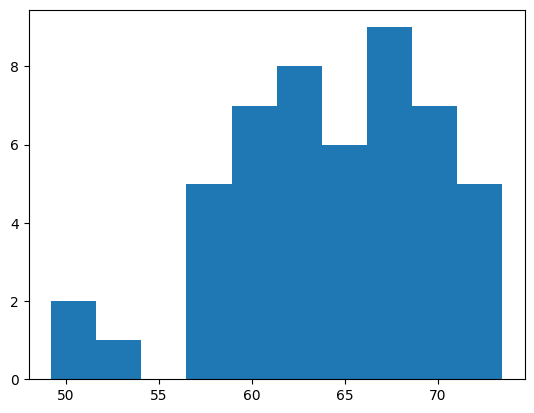

In [94]:
def chi2(x):
    mean = np.mean(x)
    sigma = np.var(x)
    #sigma = 0.1
    chi2 = np.sum(((x-mean)/sigma)**2)
    return chi2
#chi2(s1[2])
Chi2 = np.zeros(100)
for i in range(100):
    Chi2[i] = chi2(s1[i])
plt.hist(s1[3])
print(chi2(s1[3]))

## Problem 2: Magnitude distributions and colors

Use `astropy.io.fits` to load the six fits files called `magnitudes0.fits` to `magnitudes5.fits`. Find out how to extract the magnitudes of the galaxies in each of the files in $g$, $r$, and $i$ bands. Write a function that takes the fits object and returns the colors:
$$C_1 =  \mathrm{mag}_g - \mathrm{mag}_r$$
$$C_2 =  \mathrm{mag}_i - \mathrm{mag}_r$$
Plot histograms of the colors and the color-color plane of each of the catalogs. 

Can you spot the non-consistent catalogs by eye?

## Problem 3: T-test

Use the t-test (from `scipy.stats.ttest_ind`, for example) to compare both $C_1$ and $C_2$ between the different catalogs. 

Which catalogs are non-consistent with 95% confidence? 

## Problem 4: KS-test

Use the KS-test (from `scipy.stats.ks_2samp`, for example) to compare both $C_1$ and $C_2$ between the different catalogs. 

(i) Which catalogs are non-consistent with 95% confidence? 

(ii) How do you explain the discrepancies between findings of problem 3 and 4?